BU PROJEDE ÖNCEKİ 5 KELİMEYİ KULLANARAK ARDINDAN GELECEK OLAN 6. KELİMEYİ TAHMİN EDEN BİR KELİME TAHMİN MODELİ GELİŞTİRECEĞİZ.

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [2]:
#ELİMİZDEKİ TXT DOSYASINI OKUYORUZ.
with open('1661-0.txt','r',encoding='utf-8') as f:
    text = f.read().lower()

In [3]:
#TEXT 581.888 KARAKTERDEN OLUŞUYOR.
len(text)

581888

In [4]:
#BURADA TEXT İ KELİME KELİME TOKENİZE EDİYORUZ. İÇERİSİNDE BULUNAN ÜNLEM NOKTALAMA VB İFADELERİ KALDIRIYORUZ. r'w+' BUNA YARIYOR.
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [5]:
#ilk elemanı yazdıralım.
words[0]

'project'

In [7]:
#BURADA WORDS İÇERİSİNDE BENZERSİZ KELİMELERİ BULARAK BİR DEĞİŞKENE ATIYORUZ. DAHA SONRASINDA BU FARKLI KELİMELERE SAYILAR VERİYORUZ.
# ÖRNEĞİN " 'cat':0, 'dog': 1, 'snake':2 " GİBİ. 
unique_word = np.unique(words)
unique_word_index = dict((c,i) for i, c in enumerate(unique_word))

In [8]:
#PROJECT KELİMESİ BİZİM İÇİN 5598 SAYISI İLE TEMSİL EDİLİYOR.
unique_word_index['project']

5598

In [9]:
#AŞAĞIDAKİ KOD İLK 5 KELİMEYİ ÖNCEKİ KELİMELER LİSTESİNE KAYDEDİYOR SONRAKİ 6. KELİMEYİ SONRAKİ KELİME LİSTESİNE KAYDEDİYOR.
#BÖYLECE 5 KELİME GÖRÜP SONRAKİ KELİMEYİ TAHMİN ETMESİ İÇİN VERİYİ HAZIRLIYORUZ.
#BU ŞEKİLDE TEXT TE BULUNAN TÜM KELİMELERİ AYARLIYORUZ.
#AŞAĞIDA DAHA ANLAŞILIR ŞEKİLDE ÖRNEKLENDİRİLDİ.
word_length = 5
önceki_kelimeler = []
sonraki_kelime = []
for i in range(len(words) - word_length):
    önceki_kelimeler.append(words[i:i+word_length])
    sonraki_kelime.append(words[i+word_length])

In [10]:
#BURADA LİSTENİN İLK ELEMANI OKUDUĞUMUZ TEXT DOSYASININ İLK 5 KELİMESİ
önceki_kelimeler[0]

['project', 'gutenberg', 's', 'the', 'adventures']

In [11]:
#BURADAKİ LİSTENİN İLK ELEMANI YUKARIDAKİ 5 KELİMEDEN SONRA GELEN 6. KELİME
sonraki_kelime[0]

'of'

In [12]:
önceki_kelimeler[1]

['gutenberg', 's', 'the', 'adventures', 'of']

In [13]:
sonraki_kelime[1]

'sherlock'

In [14]:
#SIFIRLARDAN NUMPY ARRAYLAR OLUŞTURDUK. BUNLARIN İÇERİSİNE KELİMELERE GÖRE 1 YAZACAĞIZ.

x = np.zeros((len(önceki_kelimeler),word_length,len(unique_word)) ,dtype=bool)
y = np.zeros((len(sonraki_kelime),len(unique_word)),dtype=bool)

In [15]:
x.shape

(109221, 5, 8201)

In [16]:
y.shape

(109221, 8201)

In [17]:
"""
YUKARIDA OLUŞTURDUĞUMUZ NUMPY ARRAYLARI DOLDURUYORUZ. ÖRNEK OLARAK;
İLK ÖNCE ÖNCEKİ_KELİMELER LİSTESİNİ FOR DÖNGÜSÜ İLE GEZİYORUZ. BU LİSTENİN İLK ELEMANI YUKARIDA YAZILDIĞI GİBİ 
['project', 'gutenberg', 's', 'the', 'adventures'] ŞEKLİNDEYDİ. AYRICA BUNA BİR DE NUMARA VERİYORUZ ENUMERATE FONKSİYONU İLE. YANİ İLK FOR DÖNGÜSÜNÜN
SONUCUNDA ŞÖYLE BİR ÇIKTI OLUYOR;
  '0, ['project', 'gutenberg', 's', 'the', 'adventures']'
BURADA İ HATRFİ 0'ı each_words ise  ['project', 'gutenberg', 's', 'the', 'adventures'] LİSTESİNİ TEMSİL EDİYOR.
İKİNCİ FOR DÖNGÜSÜNDE İSE ['project', 'gutenberg', 's', 'the', 'adventures'] LİSTESİNİ TEMSİL EDEN 'each_words' U FOR İLE GEZİYORUZ.
BUNUN SONUCUNDA DA YİNE ENUMERATE İLE HER BİR ELEMANA SAYI VERİYORUZ. YANİ ÇIKTIMI ŞÖYLE OLACAK;
0,'project'
1,'gutenberg'
.
.
.
ŞEKLİNDE. BURADAKİ SAYILAR j HARFİ İLE KELİMELER İSE each_word İLE TEMSİZ EDİLİYOR.
DAHA SONRASINDA "X[i, j, unique_word_index[each_word]] = 1" SATIRINDA YUKARIDA TANIMLAMIŞ OLDUĞUMUZ unique_word_index SÖZLÜĞÜNDEN each_word İLE 
TEMSİL ETTİĞİMİZ KELİMENİN İNDEXİNE BAKIYORUZ. BUNUN İÇİN YUKARIDA PROJECT KELİMESİNİN TUTULDUĞU SAYIYI YAZDIRMIŞTIK.
YANİ SONUÇ OLARAK İLK FOR DÖNGÜSÜNDE İ =0 , j = 0, VE unique_word_index['project'] = 5598 OLDUĞUNA GÖRE BURADA YAPILMAYA ÇALIŞILAN ŞU;
NUMPY ARRAYİNDE (0,0,5598) OLAN DEĞERİN YERİNE 1 YAZ. BÖYLELİKLE ARTIK PROJECT KELİMESİ BİZİM İÇİN NUMPY ARRAYİNDE (0,0,5598) DE 1 İLE TEMSİL EDİLİYOR.
BASİT BİR ÖRNEĞİ ŞU ŞEKİLDE YAZABİLİRİZ;
0 0 0 1 0 MESELA BU SATIR PROJECT KELİMESİNİ İFADE EDİYOR
0 1 0 0 0 BU SATIR SNAKE KELİMESİNİ İFADE EDİYOR
0 0 0 0 1 BU SATIR OFF KELİMESİNİ İFADE EDİYOR ŞEKLİNDE DÜŞÜNÜLEBİLİR.

BÖYLECE TÜM WORDS İÇERİSİNDE Kİ KELİMELERİ DOLANARAK YUKARIDAKİ NUMPY ARRAYİNİ DOLDURUYORUZ.

"""
for i, each_words in enumerate(önceki_kelimeler):
    for j, each_word in enumerate(each_words):
        x[i, j, unique_word_index[each_word]] = 1
    y[i, unique_word_index[sonraki_kelime[i]]] = 1

In [36]:
#MODELİMİZİ OLUŞTURUYORUZ.
model = Sequential()
model.add(LSTM(64, input_shape=(5,8201)))
model.add(Dense(8201,activation='softmax'))

In [37]:
#OPTİMİZER OLARAK RMSPROP KULLANIYORUZ. VE LEARNING RATE OLARAK 0.01 AYARLIYORUZ.
from keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.01)

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [39]:
history = model.fit(x, y, validation_split=0.3, batch_size=128, epochs=2, shuffle=True).history

Epoch 1/2
598/598 [==============================] - 34s 56ms/step - loss: 6.1468 - accuracy: 0.0943 - val_loss: 6.0692 - val_accuracy: 0.1147
Epoch 2/2
598/598 [==============================] - 32s 53ms/step - loss: 5.7056 - accuracy: 0.1363 - val_loss: 6.2849 - val_accuracy: 0.1253


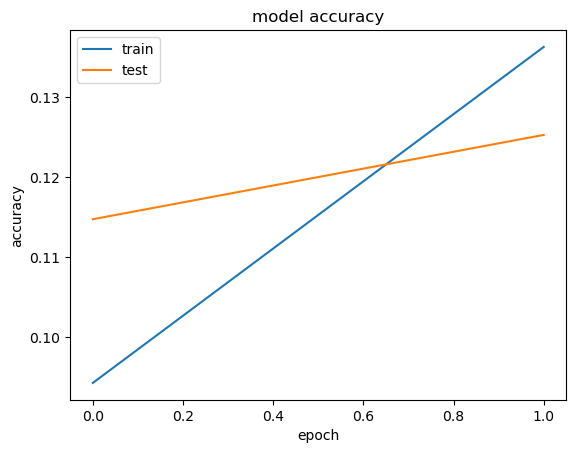

In [41]:
#MODELİMİZİN BAŞARISINI GRAFİK İLE GÖZLEMLİYORUZ.
import matplotlib.pyplot as plt
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

BU PROJEDE ÖNCEKİ KELİMELERE GÖRE SONRAKİ KELİMEYİ TAHMİN ETMEYE ÇALIŞTIK. 2 EPOCHS İLE EĞİTTİĞİMİZ MODELİN GRAFİĞİNDE ACCURACY SKORUNUN ARTTIĞINI GÖZLEMLEYEBİLİYORUZ. DAHA FAZLA EPOCHS VE DAHA FAZLA VERİ İLE DAHA BAŞARILI SONUÇLAR ELDE EDİLEBİLİR.